In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [69]:
train_csv = pd.read_csv('train.csv')
test_csv = pd.read_csv('test.csv')

In [70]:
df = pd.concat([train_csv, test_csv])

In [71]:
# delete the id columns, they are not useful to us
del df['Unnamed: 0']
del df['id']

In [72]:
df.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [73]:
df.head()

Gender      Customer Type  Age   Type of Travel     Class  Flight Distance  \
0    Male     Loyal Customer   13  Personal Travel  Eco Plus              460   
1    Male  disloyal Customer   25  Business travel  Business              235   
2  Female     Loyal Customer   26  Business travel  Business             1142   
3  Female     Loyal Customer   25  Business travel  Business              562   
4    Male     Loyal Customer   61  Business travel  Business              214   

   Inflight wifi service  Departure/Arrival time convenient  \
0                      3                                  4   
1                      3                                  2   
2                      2                                  2   
3                      2                                  5   
4                      3                                  3   

   Ease of Online booking  Gate location  ...  Inflight entertainment  \
0                       3              1  ...                       5   
1                       3              3  ...                       1   
2                       2              2  ...                       5   
3                       5              5  ...                       2   
4                       3              3  ...                       3   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 4                 3                 4                4   
1                 1                 5                 3                1   
2                 4                 3                 4                4   
3                 2                 5                 3                1   
4                 3                 4                 4                3   

   Inflight service  Cleanliness  Departure Delay in Minutes  \
0                 5            5                          25   
1                 4            1                           1   
2                 4            5                           0   
3                 4            2                          11   
4                 3            3                           0   

   Arrival Delay in Minutes             satisfaction  
0                      18.0  neutral or dissatisfied  
1                       6.0  neutral or dissatisfied  
2                       0.0                satisfied  
3                       9.0  neutral or dissatisfied  
4                       0.0                satisfied  

[5 rows x 23 columns]

In [74]:
round(df.describe(), 2)

Age  Flight Distance  Inflight wifi service  \
count  129880.00        129880.00              129880.00   
mean       39.43          1190.32                   2.73   
std        15.12           997.45                   1.33   
min         7.00            31.00                   0.00   
25%        27.00           414.00                   2.00   
50%        40.00           844.00                   3.00   
75%        51.00          1744.00                   4.00   
max        85.00          4983.00                   5.00   

       Departure/Arrival time convenient  Ease of Online booking  \
count                          129880.00               129880.00   
mean                                3.06                    2.76   
std                                 1.53                    1.40   
min                                 0.00                    0.00   
25%                                 2.00                    2.00   
50%                                 3.00                    3.00   
75%                                 4.00                    4.00   
max                                 5.00                    5.00   

       Gate location  Food and drink  Online boarding  Seat comfort  \
count      129880.00       129880.00        129880.00     129880.00   
mean            2.98            3.20             3.25          3.44   
std             1.28            1.33             1.35          1.32   
min             0.00            0.00             0.00          0.00   
25%             2.00            2.00             2.00          2.00   
50%             3.00            3.00             3.00          4.00   
75%             4.00            4.00             4.00          5.00   
max             5.00            5.00             5.00          5.00   

       Inflight entertainment  On-board service  Leg room service  \
count               129880.00         129880.00         129880.00   
mean                     3.36              3.38              3.35   
std                      1.33              1.29              1.32   
min                      0.00              0.00              0.00   
25%                      2.00              2.00              2.00   
50%                      4.00              4.00              4.00   
75%                      4.00              4.00              4.00   
max                      5.00              5.00              5.00   

       Baggage handling  Checkin service  Inflight service  Cleanliness  \
count         129880.00        129880.00         129880.00    129880.00   
mean               3.63             3.31              3.64         3.29   
std                1.18             1.27              1.18         1.31   
min                1.00             0.00              0.00         0.00   
25%                3.00             3.00              3.00         2.00   
50%                4.00             3.00              4.00         3.00   
75%                5.00             4.00              5.00         4.00   
max                5.00             5.00              5.00         5.00   

       Departure Delay in Minutes  Arrival Delay in Minutes  
count                   129880.00                 129487.00  
mean                        14.71                     15.09  
std                         38.07                     38.47  
min                          0.00                      0.00  
25%                          0.00                      0.00  
50%                          0.00                      0.00  
75%                         12.00                     13.00  
max                       1592.00                   1584.00

In [79]:
df.info()
# We have 22 total features, 1 target value. Most of the features are Numerical, 5 of them are categorical. 
# The target variable is also categorical

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129880 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   gender                             129880 non-null  object 
 1   customer_type                      129880 non-null  object 
 2   age                                129880 non-null  int64  
 3   type_of_travel                     129880 non-null  object 
 4   class                              129880 non-null  object 
 5   flight_distance                    129880 non-null  int64  
 6   inflight_wifi_service              129880 non-null  int64  
 7   departure/arrival_time_convenient  129880 non-null  int64  
 8   ease_of_online_booking             129880 non-null  int64  
 9   gate_location                      129880 non-null  int64  
 10  food_and_drink                     129880 non-null  int64  
 11  online_boarding                    12988

In [76]:
# change column names
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [77]:
# check for unique values in categorical columns.
# get categorical columns and covert to list
categoricals = df.select_dtypes('object').columns.tolist()

In [78]:
unique_col_values = {}
for category in categoricals:
    unique_col_values[category] = df[category].unique().tolist()
unique_col_values

{'gender': ['Male', 'Female'],
 'customer_type': ['Loyal Customer', 'disloyal Customer'],
 'type_of_travel': ['Personal Travel', 'Business travel'],
 'class': ['Eco Plus', 'Business', 'Eco'],
 'satisfaction': ['neutral or dissatisfied', 'satisfied']}

In [94]:
target_data = df['satisfaction'].value_counts(True)

In [97]:
target_data

neutral or dissatisfied    0.565537
satisfied                  0.434463
Name: satisfaction, dtype: float64

In [ ]:
# The target data shows that more than half the people are unsatisfied with the flight.

([<matplotlib.patches.Wedge at 0x13c3c5290>,
 [Text(-0.22488421808296188, 1.0767669610724575, 'unsatisfied'),
  Text(0.22488411726876187, -1.0767669821276329, 'satisfied')],
 [Text(-0.12266411895434283, 0.5873274333122495, '56.6%'),
  Text(0.12266406396477919, -0.5873274447968906, '43.4%')])

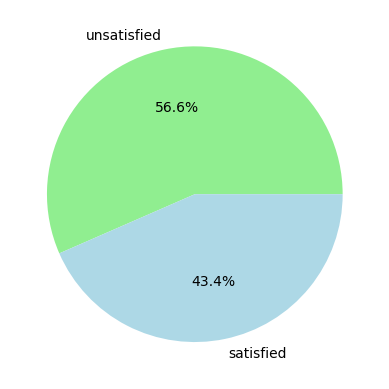

In [96]:
plt.pie(target_data, colors=['lightgreen', 'lightblue'], labels=['unsatisfied', 'satisfied'], autopct='%1.1f%%')